# TECNOLOGICO DE MONTEREY
## Reto-> Entrega 1 -> Limpieza, análisis, visualización y kmeans
### Maria de La Paz Rico
#### Noviembre - 2022

Cristian Miranda - A01793718

## Modulos

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen


import warnings
warnings.filterwarnings('ignore')


from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min 
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

import qeds

## Carga de datos

In [40]:
# Dataset disponibles
archive = "http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip"
resp = urlopen(archive)
myzip = ZipFile(BytesIO(resp.read()))
myzip.namelist()

['Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
 'Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.kmz',
 'Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
 'Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.kmz',
 'Datos_de_calidad_del_agua_2020/Escalas_subterranea.csv',
 'Datos_de_calidad_del_agua_2020/Escalas_superficial.csv']

### 1.Limpieza de base de datos.

In [180]:
# Seleccion de aguas subterraneas
df = pd.read_csv( myzip.open('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'), encoding='windows-1252')
print('Dimension de base', df.shape)
df.head()

Dimension de base (1068, 57)


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Se verifican los valores nulos de la base para excluirlos o imputarlos.

In [139]:
# Porcentaje de valores nulos
df.isnull().sum() / df.shape[0] * 100

CLAVE                     0.000000
SITIO                     0.000000
ORGANISMO_DE_CUENCA       0.000000
ESTADO                    0.000000
MUNICIPIO                 0.000000
ACUIFERO                  0.000000
SUBTIPO                   0.000000
LONGITUD                  0.000000
LATITUD                   0.000000
PERIODO                   0.000000
ALC_mg/L                  0.374532
CALIDAD_ALC               0.374532
CONDUCT_mS/cm             0.561798
CALIDAD_CONDUC            0.561798
SDT_mg/L                100.000000
SDT_M_mg/L                0.187266
CALIDAD_SDT_ra            0.187266
CALIDAD_SDT_salin         0.187266
FLUORUROS_mg/L            0.000000
CALIDAD_FLUO              0.000000
DUR_mg/L                  0.093633
CALIDAD_DUR               0.093633
COLI_FEC_NMP/100_mL       0.000000
CALIDAD_COLI_FEC          0.000000
N_NO3_mg/L                0.093633
CALIDAD_N_NO3             0.093633
AS_TOT_mg/L               0.000000
CALIDAD_AS                0.000000
CD_TOT_mg/L         

Se decide por eliminar las columnas con valores nulos mayores al 20% y posteriormente se filtra la base con el resto de valores perdidos al ser menores al 10%

In [181]:
eliminar = ['CALIDAD_N_NO3','CLAVE','PERIODO','FE_TOT_mg/L', 'ORGANISMO_DE_CUENCA', 'ESTADO', 
           'MUNICIPIO','CONTAMINANTES','SUBTIPO','ACUIFERO','SDT_mg/L','SITIO']

df.drop(columns=eliminar,inplace=True)
df = df.dropna()
df.head()

,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,-102.02210,22.20887,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,-102.20075,21.99958,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,-102.28801,22.36685,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,-102.29449,22.18435,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,-110.24480,23.45138,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


###  Exploración de datos

In [94]:
# Estadistica descriptiva
df.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm
count,1054.000000,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,234.695266,1142.726471
std,6.697568,3.875005,111.147849,1248.990617
min,-116.664250,14.561150,26.640000,110.000000
25%,-105.385170,20.224857,164.257500,506.000000
50%,-102.170665,22.640705,215.825000,820.000000
75%,-98.971268,25.508770,292.930000,1328.000000
max,-86.864120,32.677713,1650.000000,18577.000000


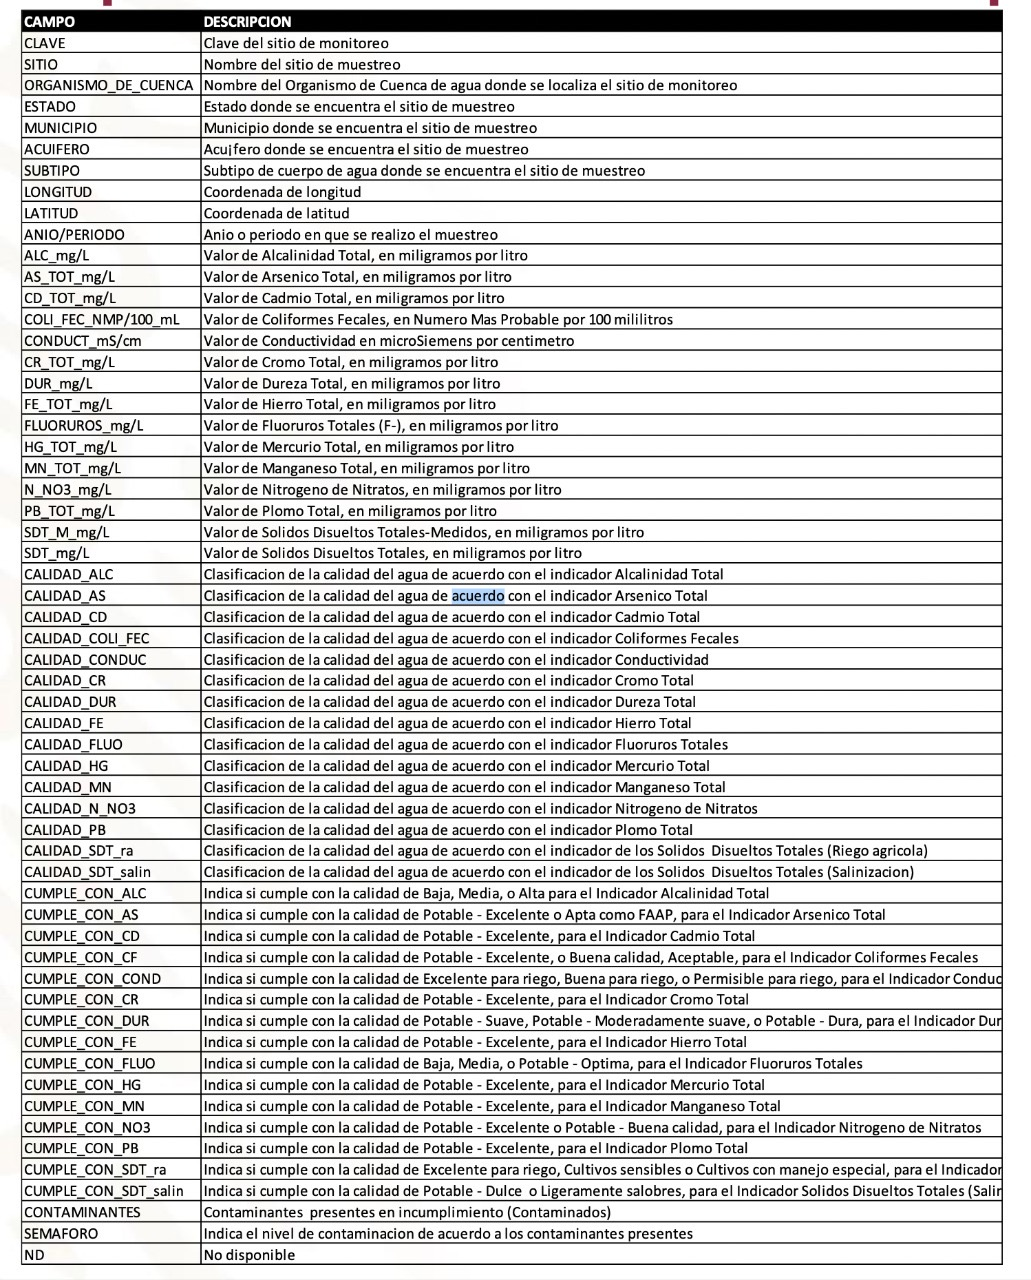

In [57]:
# Revisión de variables

from IPython.display import Image

Image('C:/Users/ADMIN/Downloads/WhatsApp Image 2022-11-13 at 8.28.54 PM.jpeg')

Se evaluan las columnas con valores del tipo `<valor` para convertir en numerico las que superen valores perdidos menores al 20% y el resto se excluyen de la base.

In [182]:
columnasAnalisis = list(df.columns[2:31])
excluir = []
corregir = []
for i in range(0,len(columnasAnalisis)):
  a = df[columnasAnalisis[i]].value_counts()
  aux = pd.DataFrame([a.index, a])
  amayorque = str(aux.iloc[0,0]) 
  aporcent = aux.iloc[1,0]/1068
  if amayorque.startswith('<') == True and aporcent > 0.20:
    excluir.append(columnasAnalisis[i])
    print('---------------')
    print(columnasAnalisis[i])
    print(amayorque)
    print(aporcent)
  if amayorque.startswith('<') == True and aporcent <= 0.20:
    corregir.append(columnasAnalisis[i])

---------------
COLI_FEC_NMP/100_mL
<1.1
0.6816479400749064
---------------
AS_TOT_mg/L
<0.01
0.7528089887640449
---------------
CD_TOT_mg/L
<0.003
0.9850187265917603
---------------
CR_TOT_mg/L
<0.005
0.7902621722846442
---------------
HG_TOT_mg/L
<0.0005
0.8960674157303371
---------------
PB_TOT_mg/L
<0.005
0.9588014981273408
---------------
MN_TOT_mg/L
<0.0015
0.5065543071161048


In [183]:
for i in range(len(corregir)):
    df[corregir[i]] = df[corregir[i]].str.extract(r"(\d+\.\d+|\d+)").astype(float)
    print(corregir[i])
    
df.drop(columns=excluir,inplace=True)
df.columns

FLUORUROS_mg/L
DUR_mg/L
N_NO3_mg/L


Index(['LONGITUD', 'LATITUD', 'ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm',
       'CALIDAD_CONDUC', 'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin',
       'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_AS', 'CALIDAD_CD',
       'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE',
       'SEMAFORO', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='object')

Existen valores extremos que se pueden identificar facilmente con un Boxplot:

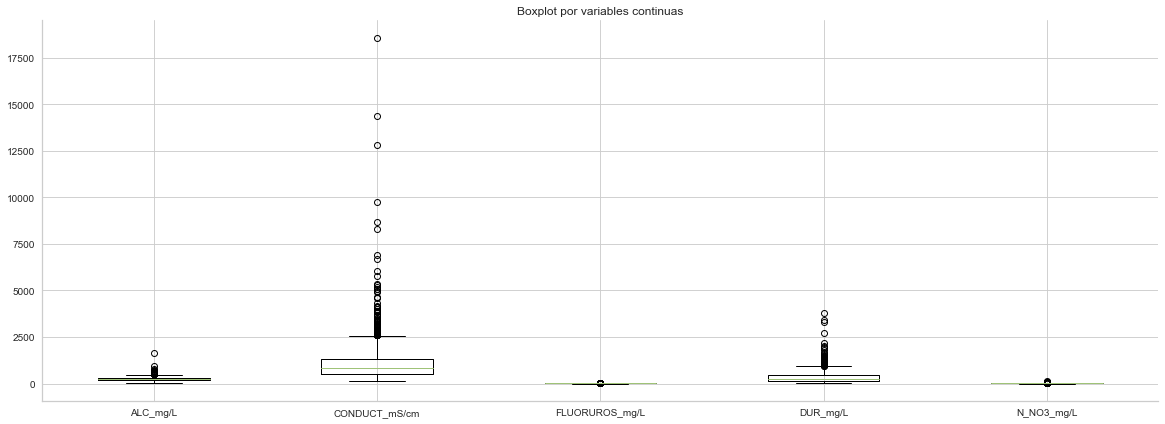

In [184]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

x = df.select_dtypes(numerics).columns.values
xx = [a for a in x if a not in ['LONGITUD', 'LATITUD']]


# Boxplot
plt.figure(figsize=(20,7))
plt.boxplot(df[xx],labels=xx)
plt.title('Boxplot por variables continuas')
plt.show()


Se generan las correlaciones de las variables numéricas:

<AxesSubplot:>

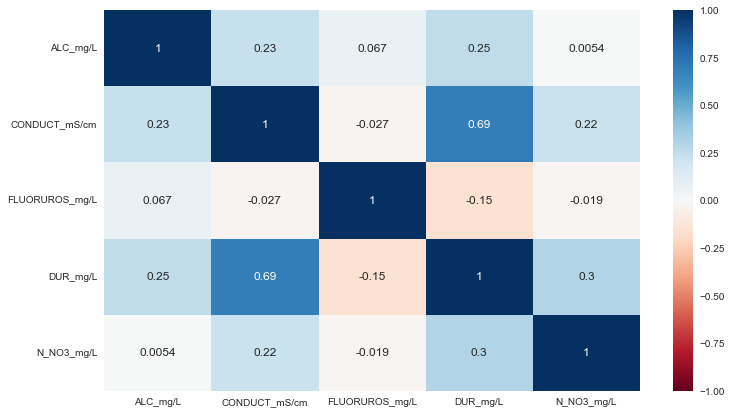

In [185]:
# Correlaciones
plt.figure(figsize=(12,7))

sns.heatmap(df[xx].corr(),vmax=1,vmin=-1,annot=True,cmap='RdBu')

Por último, se procede a dumificar las variables con respuesta binaria:

In [215]:
# Dummificacion de variables
s = [x.__contains__("CUMPLE") for x in df.columns.values]
for i in df[df.columns.values[s]]:
    df[i] = np.where(df[i]=='SI',1,0)
    print(i)

CUMPLE_CON_ALC
CUMPLE_CON_COND
CUMPLE_CON_SDT_ra
CUMPLE_CON_SDT_salin
CUMPLE_CON_FLUO
CUMPLE_CON_DUR
CUMPLE_CON_CF
CUMPLE_CON_NO3
CUMPLE_CON_AS
CUMPLE_CON_CD
CUMPLE_CON_CR
CUMPLE_CON_HG
CUMPLE_CON_PB
CUMPLE_CON_MN
CUMPLE_CON_FE


In [218]:
df.head()

,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,-102.02210,22.20887,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,...,1,1,1,1,1,1,1,1,1,1
1,-102.20075,21.99958,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,...,1,1,1,1,1,1,1,1,1,1
2,-102.28801,22.36685,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,...,1,1,1,0,1,1,1,1,1,1
3,-102.29449,22.18435,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,...,1,1,1,1,1,1,1,1,1,1
4,-110.24480,23.45138,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,...,1,1,0,1,1,1,1,1,1,1


### 2.Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

In [67]:
qeds.themes.mpl_style();

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

latlong = df[['LATITUD','LONGITUD']]

Para comenzar, se traza el mapa de méxico con los puntos en el dataset con el proposito de realizar una exploración inicial.

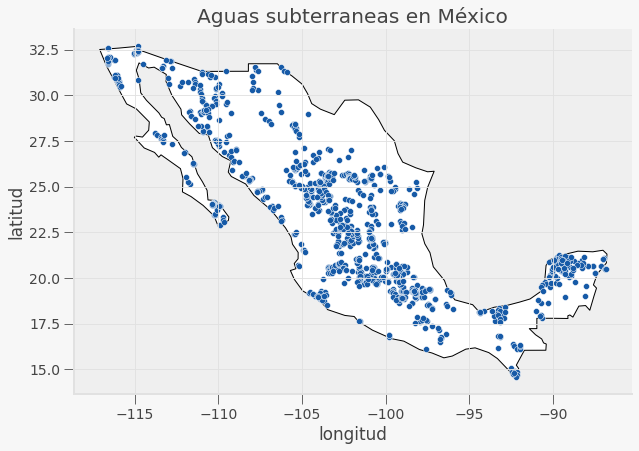

In [68]:
# Mapa inicial
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x = latlong['LONGITUD'], y = latlong['LATITUD'])
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México')

plt.show()

Ahora, se presenta el mapa coloreado de acuerdo al semáforo que se tiene como variable

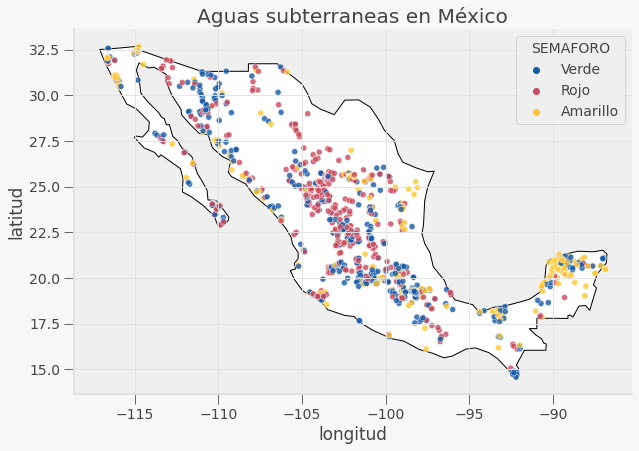

In [72]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x = latlong['LONGITUD'], y = latlong['LATITUD'], hue = df['SEMAFORO'], alpha = 0.8)
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México')

plt.show()

Visualizando el mpaa que se presenta por Semaforo, se puede determinar que los lugares con un semaforo amarillo (calidad de agua media) se presentan en la parte sureste (yucatan) presenta los niveles de agua moderado. En el centro es donde se presentan distintos puntos en color Rojo que significaría que está en una zona con bajos niveles de contaminación. Por ultimo, en la región noroeste se tienen distintas partes coloreadas dispersas.

### 3. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

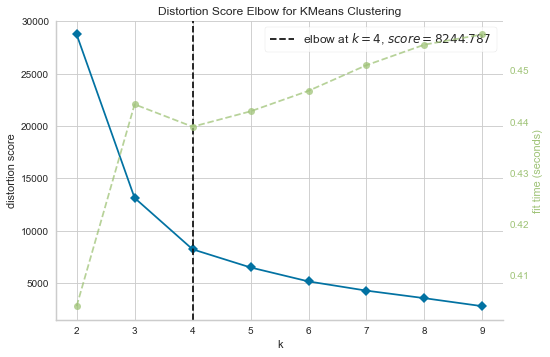

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
# Seleccion de clusters
# Elbow Method for K means
kmeans = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(kmeans, k=(2,10), timings= True)
visualizer.fit(latlong)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [85]:
# Entrenamiento del modelo
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=0).fit(latlong)

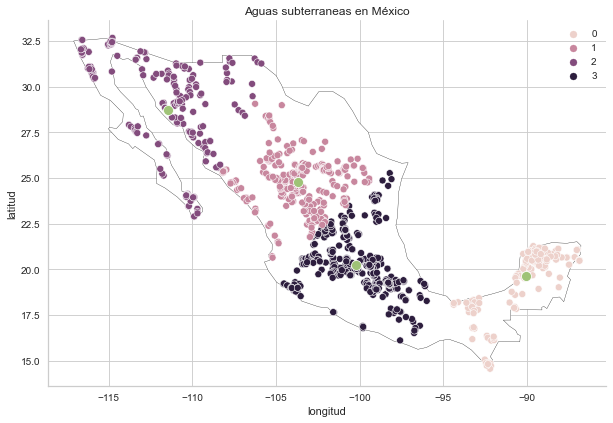

In [86]:
# Grafico de clustes
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x = latlong['LONGITUD'], y = latlong['LATITUD'], hue = kmeans.labels_)
sns.scatterplot(x = kmeans.cluster_centers_[:,1], y = kmeans.cluster_centers_[:,0], s=100)
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México')

plt.show()

De acuerdo al método del codo se establecen 4 clusters que se pueden evidencian dentro del mapa a partir del gráfico previo. Dos clusters para la parte centronorte y centro sur, uno para el noroeste y otra para el sureste.